In [1]:
# ==========================================================
# FEATURE SELECTION ON HEART DISEASE UCI
# Step 1: Setup and data loading
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Make plots look nice
sns.set(style="whitegrid")

# Adjust this path only if your file is elsewhere
DATA_PATH = "./Data/heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(DATA_PATH)

print("Loaded file:", DATA_PATH)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
display(df.head())

Loaded file: ./Data/heart_disease_uci.csv
Shape: (920, 16)
Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# Basic info about the dataset
print("Dataset information:\n")
print(df.info())

# Check for missing values
print("\nMissing values per column:\n", df.isna().sum())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())



Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Missing values per column:
 id            0
age           0
sex           0
dataset       0
cp       

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [ ]:
# List all column names
print("Columns in dataset:\n", df.columns.tolist(), "\n")

# Show the unique values in the last column (potential target)
last_col = df.columns[-1]
print(f"Last column '{last_col}' unique values:\n", df[last_col].unique())

# Show first few rows again to visually confirm
display(df.head())


Columns in dataset:
 ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] 

Last column 'target' unique values:
 [0 1]


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Unique values in target column: [0 1]


/var/folders/kz/2m26_l2x33gbx86mj66vhv_h0000gn/T/ipykernel_7681/2687454405.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


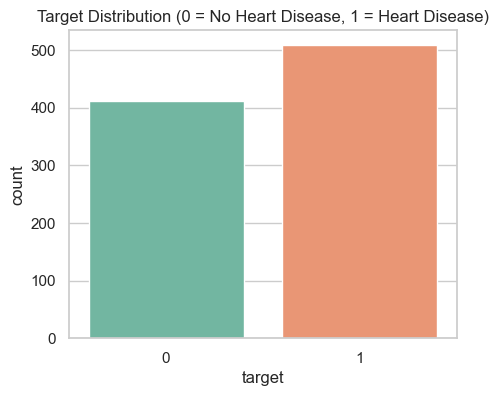

In [5]:
# Convert 'num' column to binary: 0 = no disease, 1 = disease
df["target"] = (df["num"] > 0).astype(int)

# Drop the original 'num' column
df.drop("num", axis=1, inplace=True)

# Check unique values
print("Unique values in target column:", df["target"].unique())

# Visualize class balance again
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Target Distribution (0 = No Heart Disease, 1 = Heart Disease)")
plt.show()